In [38]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# !pip install factor-analyzer

df_basic = pd.read_csv("Dataframe_cleaned.csv")

del df_basic['Unnamed: 0']

# df_basic.isna().sum()

In [39]:
df_basic.head(4)

,serial_no,country_code,Name,Date,country_name,Urban_Rural,Age,Female_Male,Literate_Illiterate,Graduate_PG,Total_family_members,Dependent_family_member,Employed_Salaried,Years_of_Experience,Owns_House_Others,Married_Unmarried,REMARKS
0,1,IND-1,AMRINDER SINGH,2019-06-11 00:00:00,INDIA,U,33.0,M,L,Graduate,4.0,2.0,S,5.0,H,Y,ICA
1,2,IND-2,ANAND,2019-06-11 00:00:00,INDIA,U,30.0,M,L,Graduate,5.0,2.0,S,7.0,O,Y,ICA
2,3,IND-3,ANAND THAKUR,2019-06-11 00:00:00,INDIA,U,31.0,M,L,Post Graduate,3.0,1.0,S,7.0,H,Y,ICA
3,4,IND-4,ANANT LAL,2019-06-11 00:00:00,INDIA,U,35.0,M,L,Post Graduate,3.0,1.0,S,13.0,O,Y,ICA


### Rename country_code to code , there should be a common column to merge the dataframes 

In [40]:
df_basic = df_basic.rename(columns={'country_code': 'code'})

df_basic.columns

Index(['serial_no', 'code', 'Name', 'Date', 'country_name', 'Urban_Rural',
       'Age', 'Female_Male', 'Literate_Illiterate', 'Graduate_PG',
       'Total_family_members', 'Dependent_family_member', 'Employed_Salaried',
       'Years_of_Experience', 'Owns_House_Others', 'Married_Unmarried',
       'REMARKS'],
      dtype='object')

## Merge all questions together 

In [41]:
from functools import reduce
import pandas as pd

df_set1 = pd.read_csv("encoded_que/encoded_Set1.csv")

df_set2 = pd.read_csv("encoded_que/encoded_Set2.csv")

df_set3 = pd.read_csv("encoded_que/encoded_Set3.csv")

# df_set4 = pd.read_csv("encoded_que/encoded_Set4.csv")  # 5 kinds of ans

# contains negative and positive values
# df_set5 = pd.read_csv("encoded_que/encoded_Set5.csv")

# df_set6 = pd.read_csv("encoded_que/encoded_Set6.csv") # 3 kinds of ans

data_frames = [df_set1, df_set3,
               df_set2]  # List of your dataframes
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Unnamed: 0'],
                                                how='outer'), data_frames)

In [42]:
print("number of questions(columns) in merged dataset",len(df_merged.columns))

number of questions(columns) in merged dataset 53


In [43]:
df_merged.head(4)

,Unnamed: 0,BXIZZB001V010001,BXIZZB001V010002,BXIZZB001V010003,BXIZZB001V010004,BXIZZB001V010005,BXIZZB001V010006,BXIZZB001V010007,BXIZZB001V010008,BXIZZB001V010009,...,BXIZZB001V010031,BXIZZB001V010032,BXIZZB001V010033,BXIZZB001V010034,BXIZZB001V010035,BXIZZB001V010036,BXIZZB001V010037,BXIZZB001V010038,BXIZZB001V010039,BXIZZB001V010040
0,ind_1,2,4,4,1,4,0,4,1,3,...,3,1,4,3,2,2,3,3,5,2
1,ind_2,5,5,4,5,3,5,0,3,5,...,4,4,4,4,0,4,4,4,4,4
2,ind_3,5,1,5,3,3,3,1,3,3,...,3,3,4,3,3,2,3,3,3,2
3,ind_4,4,0,2,2,2,1,2,2,3,...,3,4,3,3,3,4,3,5,3,2


In [44]:
# df_merged.to_csv("df_merged_sets.csv")

## Correlation map 

In [45]:

df_behavioral = df_merged
df_behavioral.shape

(144, 53)

In [46]:
df_behavioral = df_behavioral.loc[:, df_behavioral.columns != 'Unnamed: 0']

df_behavioral = df_behavioral.loc[:, df_behavioral.columns != "Unnamed: 0.1"]


df_behavioral.columns
df_corr = df_behavioral.iloc[1:50 ,1:25]

In [47]:
# from string import ascii_letters
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set(style="white")

# # Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# # Compute the correlation matrix
# corr = df_corr.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=np.bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5} , annot= True)


###### correlation custom

In [48]:

# corr_custom = df_behavioral.corr()
# df_behavioral.corr().to_csv("correlation.csv")
# corr_custom.style.background_gradient(cmap='coolwarm')

### Factor Analysis 

In [49]:
df_behavioral.columns
df_fa = df_behavioral
df_fa = df_behavioral.apply(pd.to_numeric) 
df_fa

,BXIZZB001V010001,BXIZZB001V010002,BXIZZB001V010003,BXIZZB001V010004,BXIZZB001V010005,BXIZZB001V010006,BXIZZB001V010007,BXIZZB001V010008,BXIZZB001V010009,BXIZZB001V010010,...,BXIZZB001V010031,BXIZZB001V010032,BXIZZB001V010033,BXIZZB001V010034,BXIZZB001V010035,BXIZZB001V010036,BXIZZB001V010037,BXIZZB001V010038,BXIZZB001V010039,BXIZZB001V010040
0,2,4,4,1,4,0,4,1,3,0,...,3,1,4,3,2,2,3,3,5,2
1,5,5,4,5,3,5,0,3,5,5,...,4,4,4,4,0,4,4,4,4,4
2,5,1,5,3,3,3,1,3,3,3,...,3,3,4,3,3,2,3,3,3,2
3,4,0,2,2,2,1,2,2,3,0,...,3,4,3,3,3,4,3,5,3,2
4,3,0,3,3,3,1,0,3,5,0,...,2,2,4,2,2,2,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,4,3,2,4,3,1,4,3,5,0,...,5,5,5,5,1,5,5,5,5,0
140,2,3,5,5,2,3,5,1,1,2,...,4,1,4,3,1,4,3,2,4,4
141,2,0,2,5,5,0,5,5,3,5,...,5,5,5,5,0,2,1,3,4,5
142,4,4,5,4,4,5,4,5,5,2,...,5,5,5,5,4,5,5,5,5,5


In [50]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_fa)
chi_square_value, p_value

(2683.5362158253047, 6.086267230766125e-95)

In [51]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_fa)
kmo_model

0.6490901220904852

In [52]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 4 , rotation='varimax')
# fa.set_params()
fa.fit(df_fa)
loadings = fa.loadings_
loadings[loadings>0.7]

array([], dtype=float64)

In [53]:
ev , v  = fa.get_eigenvalues()
ev[ev > 1]

array([7.55397265, 3.42236121, 2.65889817, 2.44012436, 2.10979821,
       1.87823415, 1.73829333, 1.66596059, 1.55081674, 1.50775929,
       1.39177589, 1.32691785, 1.28017021, 1.22253234, 1.13213372,
       1.08348171, 1.05267858, 1.01079529])

In [54]:
fa.get_factor_variance()

(array([3.5346721 , 3.43042364, 3.29142677, 3.02801087]),
 array([0.06797446, 0.06596969, 0.06329667, 0.05823098]),
 array([0.06797446, 0.13394415, 0.19724082, 0.2554718 ]))

In [55]:
xvals = range(1, df_fa.shape[1]+1)

In [56]:
df_factors = pd.DataFrame.from_records(loadings)
# df_factors[df_factors> 0.7]

### get new columns from factors

In [57]:
new_variables = fa.fit_transform(df_behavioral)

df_behav = pd.DataFrame(data=new_variables,    # values
            index=range(144),    # range 
            columns=["F1" ,"F2" , "F3" , "F4"])

# df_basic

common_column = df_basic['serial_no']

df_behav.insert(0,'serial_no',common_column)

df_behav.columns



Index(['serial_no', 'F1', 'F2', 'F3', 'F4'], dtype='object')

In [58]:
# df_behav.to_csv("df_4_factors.csv")

#### to merge the two dataframes of factors and other basic behavioral data

In [59]:
df_complete = df_basic.merge(df_behav)

In [60]:
# series = df_complete["F1"].apply(lambda x : x if x>0.0 else "0")

In [61]:
df_complete

,serial_no,code,Name,Date,country_name,Urban_Rural,Age,Female_Male,Literate_Illiterate,Graduate_PG,...,Dependent_family_member,Employed_Salaried,Years_of_Experience,Owns_House_Others,Married_Unmarried,REMARKS,F1,F2,F3,F4
0,1,IND-1,AMRINDER SINGH,2019-06-11 00:00:00,INDIA,U,33.000000,M,L,Graduate,...,2.0,S,5.0,H,Y,ICA,-0.877400,-1.388816,-1.035299,0.174203
1,2,IND-2,ANAND,2019-06-11 00:00:00,INDIA,U,30.000000,M,L,Graduate,...,2.0,S,7.0,O,Y,ICA,0.352291,-0.061227,2.277880,1.180867
2,3,IND-3,ANAND THAKUR,2019-06-11 00:00:00,INDIA,U,31.000000,M,L,Post Graduate,...,1.0,S,7.0,H,Y,ICA,-0.574546,-0.374978,1.110819,0.026710
3,4,IND-4,ANANT LAL,2019-06-11 00:00:00,INDIA,U,35.000000,M,L,Post Graduate,...,1.0,S,13.0,O,Y,ICA,0.382935,-1.160791,-0.123035,0.020638
4,5,IND-5,ANTIM JHAWAR,2019-06-11 00:00:00,INDIA,U,29.000000,M,L,Post Graduate,...,0.0,S,6.0,O,Y,ICA,-1.291218,-0.961918,-0.413769,0.375131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,140,IND-140,ARUNA MONDAL,21/08/2019,INDIA,R,31.372093,F,L,Graduate,...,2.0,Retailer (PSF),15.0,O,Y,VFS-ARIADAH,1.807032,0.812748,0.490809,0.160935
140,141,IND-141,MANJU BISWAS,21/08/2019,INDIA,R,31.372093,F,L,Graduate,...,2.0,Retailer (PSF),20.0,O,Y,VFS-ARIADAH,-0.210614,-1.221978,0.604147,0.162883
141,142,IND-142,ANUSUA MANNA,21/08/2019,INDIA,R,31.372093,F,L,Graduate,...,2.0,Retailer (PSF),5.0,O,Y,VFS-ARIADAH,0.141036,0.008568,-0.375856,-1.794952
142,143,IND-143,RUPALI GUPTA,21/08/2019,INDIA,R,31.372093,F,L,Graduate,...,3.0,Retailer (PSF),8.0,O,Y,VFS-ARIADAH,1.277828,0.216000,2.129991,0.651672


In [62]:
# import collections
# collections.Counter(df_basic.Age)

In [63]:
df_basic['Age'] = pd.to_numeric(df_basic['Age'], errors='coerce')

df_basic['Age'] = pd.cut(x=df_basic['Age'], bins=[17, 29, 39, 49 , 59 , 69], labels=['20', '30', '40' , '50' , '60'])

In [64]:
# Filter all rows for which the player's 
# age is greater than or equal to 40 or 60 , because data is too less 
df_filtered = df_basic[df_basic['Age']!="50"] 
print(df_basic.index[df_basic['Age']=="50"].tolist())
df_filtered = df_filtered[df_filtered['Age']!="60"] 
print(df_basic.index[df_basic['Age']=="60"].tolist())

# # Print the new dataframe 
# df_filtered.head(15)

# # Print the shape of the dataframe 
print(df_filtered.shape) 


[]
[8]
(143, 17)


In [65]:
# df_filtered.reset_index()

### how personality traits relate to characteristics(nominal features like age , gender , education etc) of a person

### Regression trees 

In [66]:
df_regression = df_behav.copy()


df_regression.head(3)

df_regression["Age"] = df_filtered["Age"]

# df_complete.to_csv("factors_and_basic.csv")

df_regression = df_regression.drop(index = [143, 17 , 8] ).reset_index()

df_regression.drop(columns=['serial_no'] , inplace=True)

df_regression.head(4)

df_regression.columns

df_regression.drop(columns=["index"] , inplace=True)

df_regression.columns

#2 Importing the dataset

y = df_regression.iloc[:,4]
y = pd.to_numeric(y, errors='coerce')
y = y.values.reshape(-1, 1)

X = df_regression.iloc[:,0:4]


### Scatter plot of factors >> class distribution of age (20 , 30)

Text(0, 0.5, 'F2')

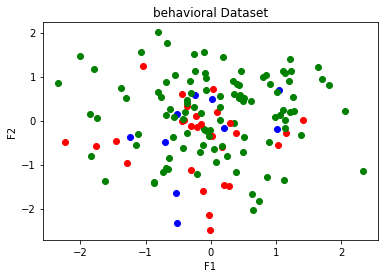

In [31]:
# create color dictionary
colors = {"20": "r",
"30": "g",
"40": "b" }
# create a figure and axis
fig, ax1 = plt.subplots()
# plot each data-point:::
for i in range(len(df_regression['F1'])):
    ax1.scatter(df_regression['F1'][i], df_regression['F2'][i],color=colors[df_regression['Age'][i]])
# set a title and labels
ax1.set_title('behavioral Dataset')
ax1.set_xlabel('F1')
ax1.set_ylabel('F2')

# ax1.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])


In [32]:
import collections
collections.Counter(df_regression.Age)

Counter({'30': 103, '20': 28, '40': 10})

### Decision Tree of Factors 

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Fontconfig error: Cannot load default config file



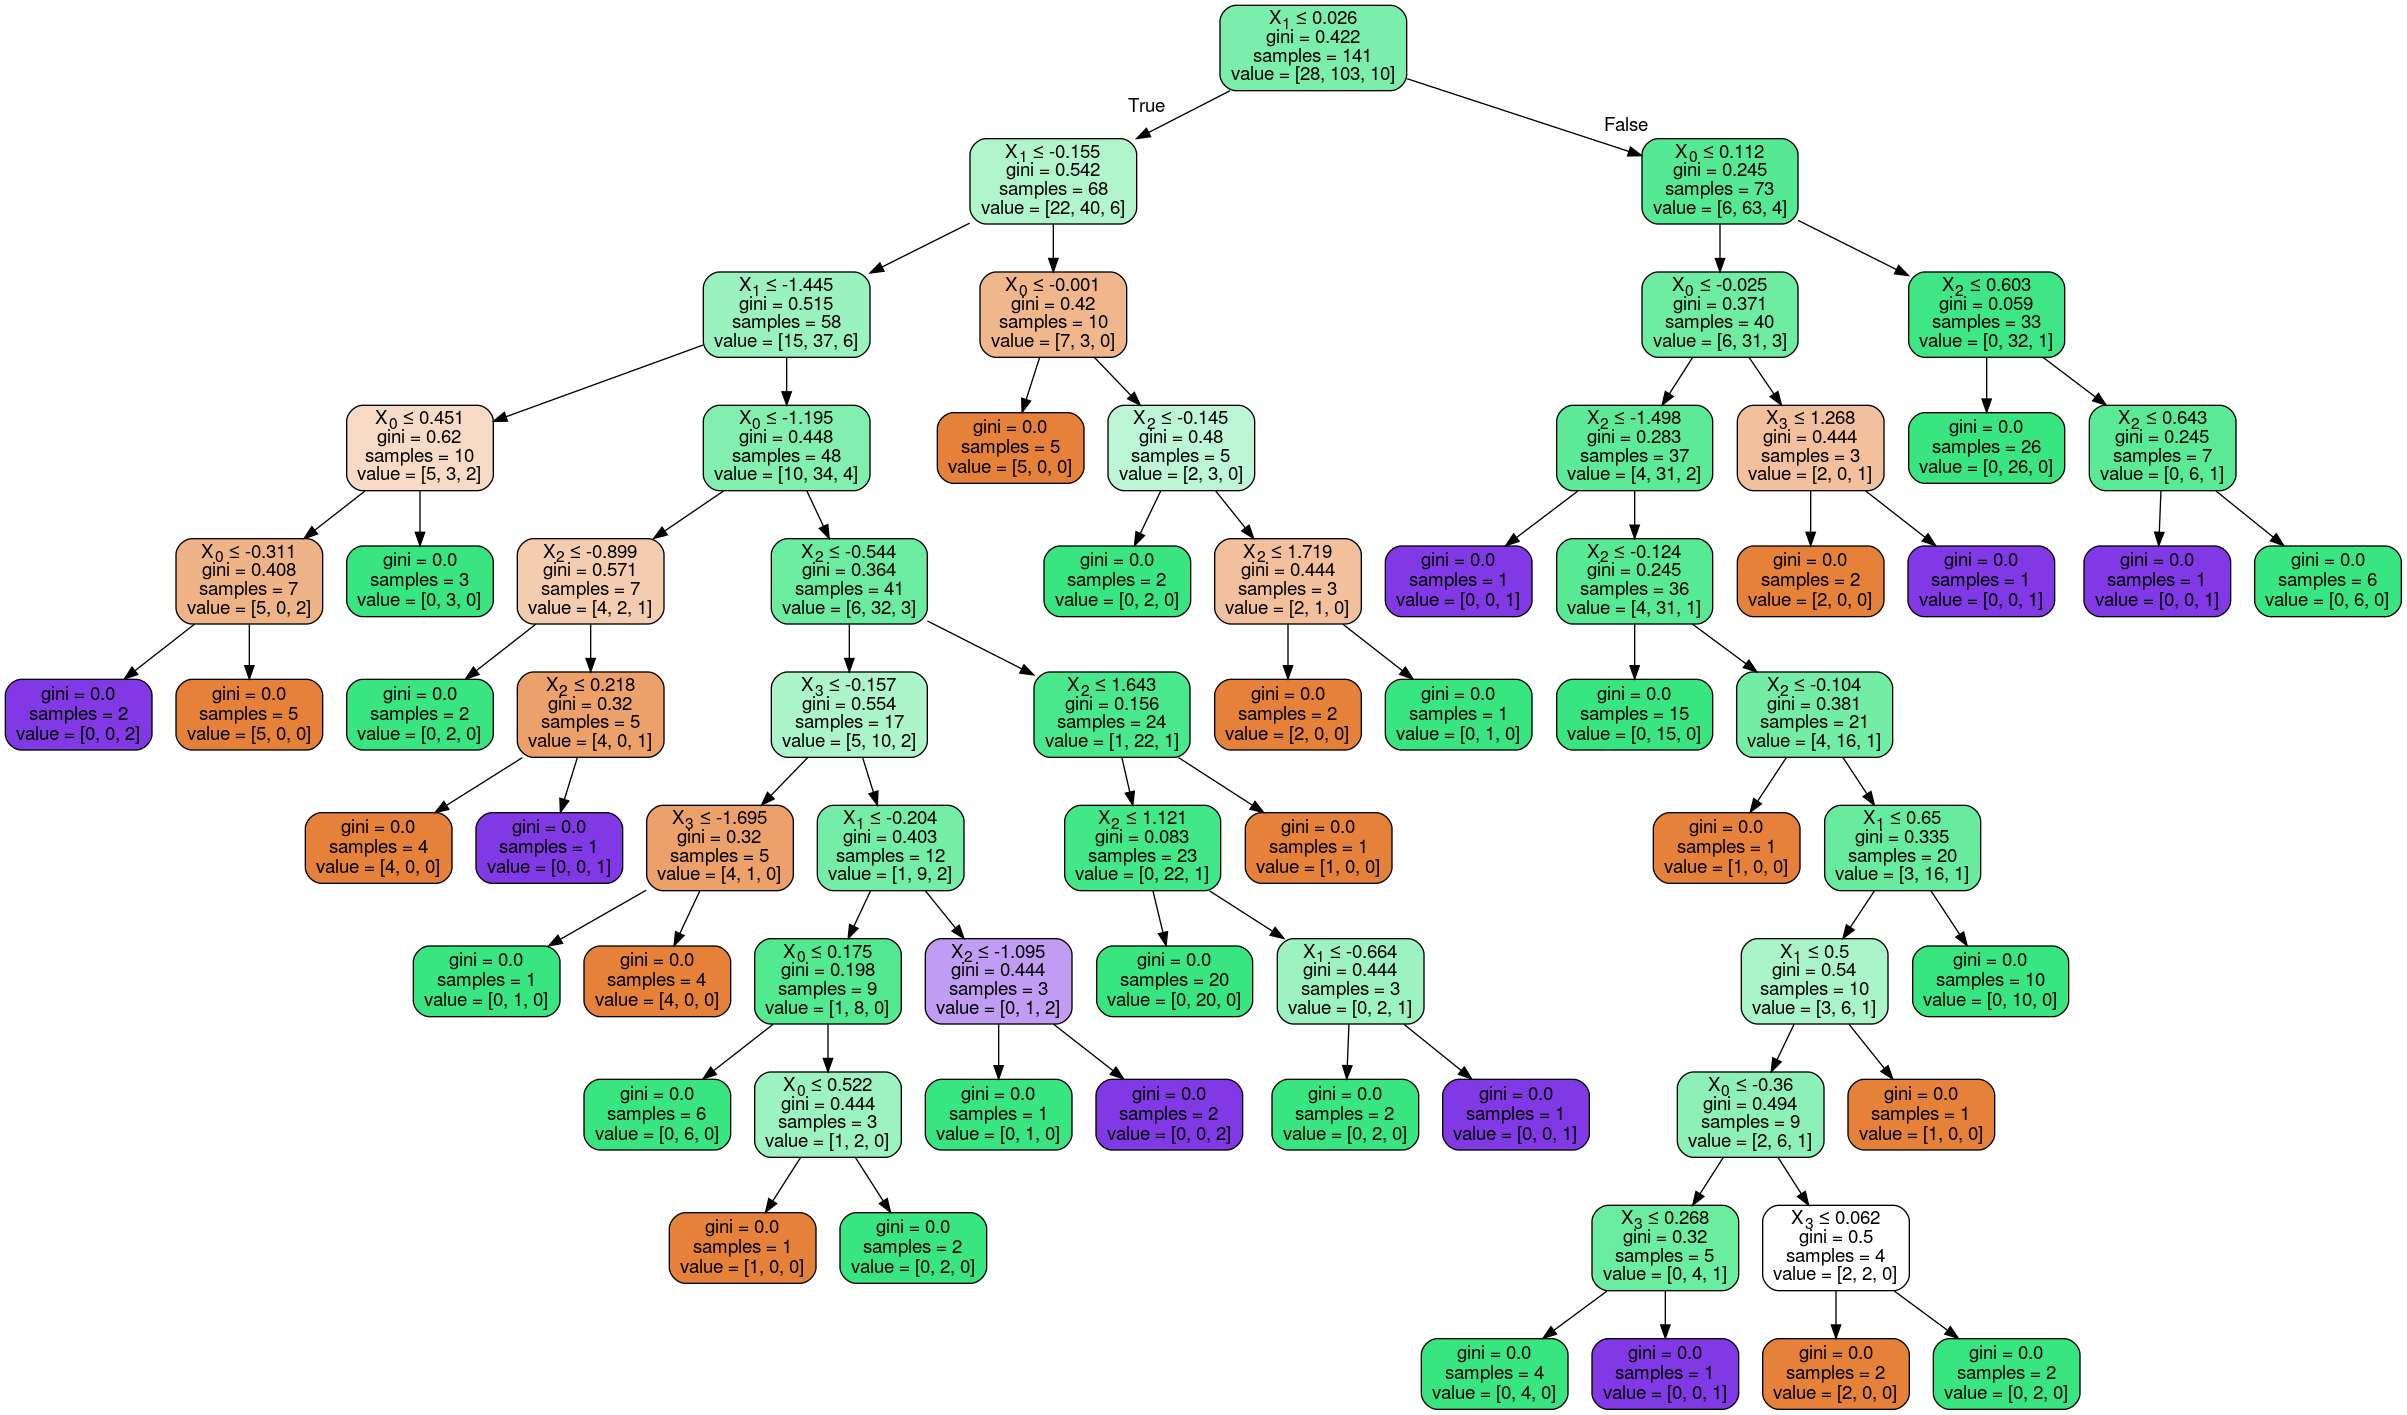

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
# def myplot(score, coeff, labels=None):
#     xs = score[:, 0]
#     ys = score[:, 1]
#     n = coeff.shape[0]
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
#     plt.scatter(xs * scalex, ys * scaley, s=5)
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
#         if labels is None:
#             plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" +
#                      str(i+1), color='green', ha='center', va='center')
#         else:
#             plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15,
#                      labels[i], color='g', ha='center', va='center')

#     plt.xlabel("PC{}".format(1))
#     plt.ylabel("PC{}".format(2))
#     plt.grid()


# myplot(pca[:, 0:2], np.transpose(
#     pcamodel.components_[0:2, :]), list(x.columns))
# plt.show()

### questions > codes > Factor Mapping 

In [36]:
df_factors.columns = ["F1" ,"F2" , "F3"]
df_factors.shape

df_behavioral.shape

df_factors = df_factors.apply(pd.to_numeric) 
dict_questions = dict(zip(range(120) , df_behavioral.columns))
index = df_factors.index




def screen_questions(df_factors , factor, dict_questions , index):
    condition = df_factors[factor] >= 0.1
    question_indices = index[condition]
#     print(question_indices)
    return [dict_questions[k] for k in question_indices]

questions_F1 = screen_questions(df_factors , "F1" , dict_questions , index)
questions_F2 = screen_questions(df_factors , "F2" , dict_questions , index)
questions_F3 = screen_questions(df_factors , "F3" , dict_questions , index)
# questions_F4 = screen_questions(df_factors , "F4" , dict_questions , index)
# questions_F5 = screen_questions(df_factors , "F5" , dict_questions , index)

# questions_F1

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [ ]:
import pingouin as pg
#Create the factors
factor1 = df_behavioral[questions_F1]
factor2 = df_behavioral[questions_F2]
factor3 = df_behavioral[questions_F3]
# factor4 = df_behavioral[questions_F4]
# factor5 = df_behavioral[questions_F5]


In [ ]:
import pickle
df_1st_Set = pd.read_csv("First_Set.csv")

with open('header.pkl', 'rb') as f:
    header_list = pickle.load(f)

df_2nd_Set = pd.read_csv("Second_Set.csv")
df_2nd_Set.columns = header_list
df_3rd_Set = pd.read_csv("Third_Set.csv")
df_3rd_Set.columns = header_list
# df_5th_Set = pd.read_csv("Fifth_Set.csv")
# df_5th_Set.columns = header_list


In [ ]:
Code_1st_Set = df_1st_Set['Code']
Code_2nd_Set = df_2nd_Set['Code']
Code_3rd_Set = df_3rd_Set['Code']
# Code_5th_Set = df_5th_Set['Code']

In [ ]:
Questions_1st_Set = df_1st_Set['mpower-u Questionnaire']
Questions_2nd_Set = df_2nd_Set['mpower-u Questionnaire']
Questions_3rd_Set = df_3rd_Set['mpower-u Questionnaire']
# Questions_5th_Set = df_5th_Set['mpower-u Questionnaire']

In [ ]:
dict1 = dict(zip(Code_1st_Set , Questions_1st_Set))
dict2 = dict(zip(Code_2nd_Set , Questions_2nd_Set))
dict3 = dict(zip(Code_3rd_Set , Questions_3rd_Set))
# dict4 = dict(zip(Code_5th_Set , Questions_5th_Set))

In [ ]:
all_codes_que_dict = {**dict1 , **dict2 , **dict3}

In [ ]:
# all_codes_que_dict

In [ ]:
# print(len(questions_F5))
def extract_questions(questions_Factor):
    questions = []
    for each in questions_Factor:
        if each in all_codes_que_dict:
            questions.append(all_codes_que_dict[each])
    return questions

In [ ]:
que_F1 = extract_questions(questions_F1)
que_F2 = extract_questions(questions_F2)
que_F3 = extract_questions(questions_F3)
# que_F4 = extract_questions(questions_F4)

In [ ]:
que_F3

In [ ]:
que_F2

In [ ]:
que_F1